# 라이브러리 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
#이거 돌리고 런타임 재시작하기!!
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,220 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and d

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='NanumGothic')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from xgboost import XGBRegressor
import xgboost
from xgboost import cv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import skew, kurtosis
from sklearn.model_selection import cross_val_score

# 데이터 확인 및 전처리

In [5]:
df = pd.read_excel('/content/drive/MyDrive/Colab/FITIsland/Dataset/flood_zero.xlsx')
df.head()

홍수사상번호       연    월     일  ...  Unnamed: 44  Unnamed: 45 Unnamed: 46 Unnamed: 47
0     NaN     NaN  NaN   NaN  ...      강우(C지역)      강우(D지역)     수위(E지역)     수위(D지역)
1     1.0  2006.0  7.0  10.0  ...            8            8        2.54      122.61
2     1.0  2006.0  7.0  10.0  ...           10           10        2.53       122.6
3     1.0  2006.0  7.0  10.0  ...           10           11        2.53      122.59
4     1.0  2006.0  7.0  10.0  ...           15           14        2.53     122.585

[5 rows x 48 columns]

In [6]:
# 기본 데이터프레임 전처리 -> float 변환
df.columns = ['홍수사상번호', '연', '월', '일', '시간', '유입량', '유역평균강수_1', '강우(A지역)_1', '강우(B지역)_1', '강우(C지역)_1', '강우(D지역)_1', '수위(E지역)_1', '수위(D지역)_1', '유역평균강수_2', '강우(A지역)_2', '강우(B지역)_2', '강우(C지역)_2', '강우(D지역)_2', '수위(E지역)_2', '수위(D지역)_2', '유역평균강수_3', '강우(A지역)_3', '강우(B지역)_3', '강우(C지역)_3', '강우(D지역)_3', '수위(E지역)_3', '수위(D지역)_3','유역평균강수_4', '강우(A지역)_4', '강우(B지역)_4', '강우(C지역)_4', '강우(D지역)_4', '수위(E지역)_4', '수위(D지역)_4', '유역평균강수_5', '강우(A지역)_5', '강우(B지역)_5', '강우(C지역)_5', '강우(D지역)_5', '수위(E지역)_5', '수위(D지역)_5', '유역평균강수_6', '강우(A지역)_6', '강우(B지역)_6', '강우(C지역)_6', '강우(D지역)_6', '수위(E지역)_6', '수위(D지역)_6']
df.drop(0, inplace=True)
df = df.astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3051 entries, 1 to 3051
Data columns (total 48 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   홍수사상번호     3051 non-null   float64
 1   연          3051 non-null   float64
 2   월          3051 non-null   float64
 3   일          3051 non-null   float64
 4   시간         3051 non-null   float64
 5   유입량        2891 non-null   float64
 6   유역평균강수_1   3051 non-null   float64
 7   강우(A지역)_1  3051 non-null   float64
 8   강우(B지역)_1  3051 non-null   float64
 9   강우(C지역)_1  3051 non-null   float64
 10  강우(D지역)_1  3051 non-null   float64
 11  수위(E지역)_1  3051 non-null   float64
 12  수위(D지역)_1  3051 non-null   float64
 13  유역평균강수_2   3051 non-null   float64
 14  강우(A지역)_2  3051 non-null   float64
 15  강우(B지역)_2  3051 non-null   float64
 16  강우(C지역)_2  3051 non-null   float64
 17  강우(D지역)_2  3051 non-null   float64
 18  수위(E지역)_2  3051 non-null   float64
 19  수위(D지역)_2  3051 non-null   float64
 20  유역평균강수_3

In [8]:
#train 데이터프레임 분리
df_train_original = df.iloc[:2891,:]
df_train_original

홍수사상번호       연    월     일  ...  강우(C지역)_6  강우(D지역)_6  수위(E지역)_6  수위(D지역)_6
1        1.0  2006.0  7.0  10.0  ...        8.0        8.0       2.54    122.610
2        1.0  2006.0  7.0  10.0  ...       10.0       10.0       2.53    122.600
3        1.0  2006.0  7.0  10.0  ...       10.0       11.0       2.53    122.590
4        1.0  2006.0  7.0  10.0  ...       15.0       14.0       2.53    122.585
5        1.0  2006.0  7.0  10.0  ...       18.0       16.0       2.53    122.575
...      ...     ...  ...   ...  ...        ...        ...        ...        ...
2887    25.0  2017.0  7.0  18.0  ...        1.0        1.0       3.03    137.130
2888    25.0  2017.0  7.0  18.0  ...        1.0        1.0       3.00    137.145
2889    25.0  2017.0  7.0  18.0  ...        1.0        1.0       2.98    137.155
2890    25.0  2017.0  7.0  18.0  ...        1.0        1.0       2.96    137.165
2891    25.0  2017.0  7.0  18.0  ...        1.0        1.0       2.94    137.180

[2891 rows x 48 columns]

In [9]:
#result 데이터 프레임 분리
df_result_original = df.iloc[2891:,:]
df_result_original

홍수사상번호       연    월    일  ...  강우(C지역)_6  강우(D지역)_6  수위(E지역)_6  수위(D지역)_6
2892    26.0  2018.0  7.0  1.0  ...        1.0        0.0       1.93    120.515
2893    26.0  2018.0  7.0  1.0  ...       14.0        8.0       1.93    120.510
2894    26.0  2018.0  7.0  1.0  ...       19.0       24.0       1.92    120.505
2895    26.0  2018.0  7.0  1.0  ...       22.0       33.0       1.92    120.500
2896    26.0  2018.0  7.0  1.0  ...       23.0       36.0       1.92    120.495
...      ...     ...  ...  ...  ...        ...        ...        ...        ...
3047    26.0  2018.0  7.0  7.0  ...        0.0        0.0       3.16    129.950
3048    26.0  2018.0  7.0  7.0  ...        0.0        0.0       3.15    129.970
3049    26.0  2018.0  7.0  7.0  ...        0.0        0.0       3.13    129.980
3050    26.0  2018.0  7.0  7.0  ...        0.0        0.0       3.11    129.990
3051    26.0  2018.0  7.0  7.0  ...        0.0        0.0       3.10    130.000

[160 rows x 48 columns]

In [10]:
#데이터집단1~6 분리시키기
df_d1 = df_train_original.loc[:,'홍수사상번호':'수위(D지역)_1']
df_d2 = pd.concat([df_train_original.loc[:,'홍수사상번호':'유입량'],df_train_original.loc[:,'유역평균강수_2':'수위(D지역)_2']],axis=1)
df_d3 = pd.concat([df_train_original.loc[:,'홍수사상번호':'유입량'],df_train_original.loc[:,'유역평균강수_3':'수위(D지역)_3']],axis=1)
df_d4 = pd.concat([df_train_original.loc[:,'홍수사상번호':'유입량'],df_train_original.loc[:,'유역평균강수_4':'수위(D지역)_4']],axis=1)
df_d5 = pd.concat([df_train_original.loc[:,'홍수사상번호':'유입량'],df_train_original.loc[:,'유역평균강수_5':'수위(D지역)_5']],axis=1)
df_d6 = pd.concat([df_train_original.loc[:,'홍수사상번호':'유입량'],df_train_original.loc[:,'유역평균강수_6':'수위(D지역)_6']],axis=1)

#데이터집단별 컬럼명 변경
df_d1.columns = ['홍수사상번호','연','월','일','시간','유입량','유역평균강수','강우(A지역)','강우(B지역)','강우(C지역)','강우(D지역)','수위(E지역)','수위(D지역)']
df_d2.columns = ['홍수사상번호','연','월','일','시간','유입량','유역평균강수','강우(A지역)','강우(B지역)','강우(C지역)','강우(D지역)','수위(E지역)','수위(D지역)']
df_d3.columns = ['홍수사상번호','연','월','일','시간','유입량','유역평균강수','강우(A지역)','강우(B지역)','강우(C지역)','강우(D지역)','수위(E지역)','수위(D지역)']
df_d4.columns = ['홍수사상번호','연','월','일','시간','유입량','유역평균강수','강우(A지역)','강우(B지역)','강우(C지역)','강우(D지역)','수위(E지역)','수위(D지역)']
df_d5.columns = ['홍수사상번호','연','월','일','시간','유입량','유역평균강수','강우(A지역)','강우(B지역)','강우(C지역)','강우(D지역)','수위(E지역)','수위(D지역)']
df_d6.columns = ['홍수사상번호','연','월','일','시간','유입량','유역평균강수','강우(A지역)','강우(B지역)','강우(C지역)','강우(D지역)','수위(E지역)','수위(D지역)']

In [11]:
df_train = pd.concat([df_d1,df_d2,df_d3,df_d4,df_d5,df_d6],axis=0)
df_train.reset_index(inplace=True)
df_train.drop(['index'],axis=1,inplace=True)
df_train

홍수사상번호       연    월     일  ...  강우(C지역)  강우(D지역)  수위(E지역)    수위(D지역)
0         1.0  2006.0  7.0  10.0  ...      7.0      8.0     2.54  122.56875
1         1.0  2006.0  7.0  10.0  ...      7.0      8.0     2.53  122.56250
2         1.0  2006.0  7.0  10.0  ...      7.0      8.0     2.53  122.55625
3         1.0  2006.0  7.0  10.0  ...      7.0      8.0     2.53  122.55625
4         1.0  2006.0  7.0  10.0  ...      8.0     10.0     2.53  122.55625
...       ...     ...  ...   ...  ...      ...      ...      ...        ...
17341    25.0  2017.0  7.0  18.0  ...      1.0      1.0     3.03  137.13000
17342    25.0  2017.0  7.0  18.0  ...      1.0      1.0     3.00  137.14500
17343    25.0  2017.0  7.0  18.0  ...      1.0      1.0     2.98  137.15500
17344    25.0  2017.0  7.0  18.0  ...      1.0      1.0     2.96  137.16500
17345    25.0  2017.0  7.0  18.0  ...      1.0      1.0     2.94  137.18000

[17346 rows x 13 columns]

In [12]:
df_train.describe()

홍수사상번호             연  ...       수위(E지역)       수위(D지역)
count  17346.000000  17346.000000  ...  17346.000000  17346.000000
mean      14.324801   2010.765825  ...      4.583075    131.842322
std        7.307992      2.716623  ...      2.422148      6.001269
min        1.000000   2006.000000  ...      1.070000    118.700000
25%        9.000000   2009.000000  ...      2.740000    127.543813
50%       16.000000   2011.000000  ...      4.080000    133.307571
75%       20.000000   2012.000000  ...      5.680000    135.291667
max       25.000000   2017.000000  ...     16.720000    143.966667

[8 rows x 13 columns]

# EDA

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


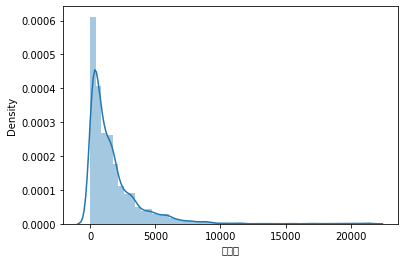

In [13]:
# 종속변수(유입량)에 대한 분석
sns.distplot(df_train['유입량'])

In [14]:
# 왜도 절대값이 3미만이어야 부합
skew(df_train['유입량'])

3.657761080911069

In [15]:
# 첨도 절대값이 7미만이어야 부합
kurtosis(df_train['유입량'], fisher=True)

21.8571137072798

(-0.5, 24.5, 0.0, 25000.0)

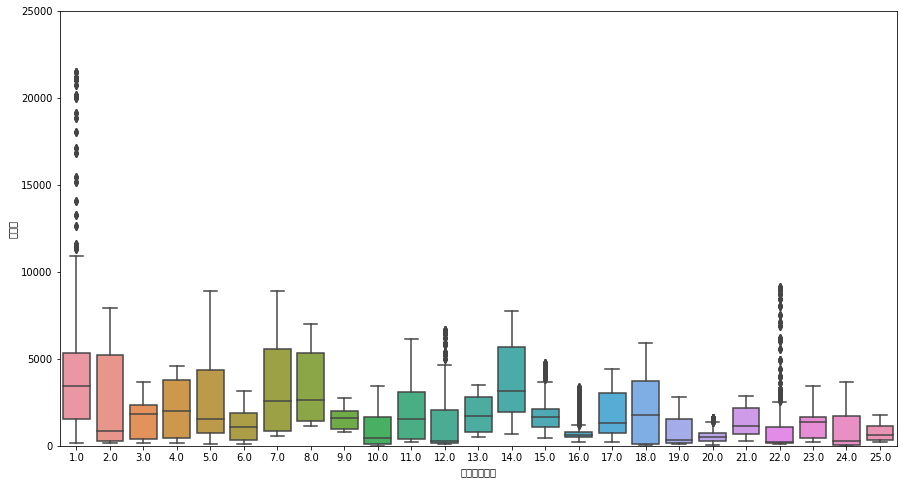

In [16]:
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x='홍수사상번호', y="유입량", data=df_train)
fig.axis(ymin=0, ymax=25000)

(-0.5, 24.5, 0.0, 25000.0)

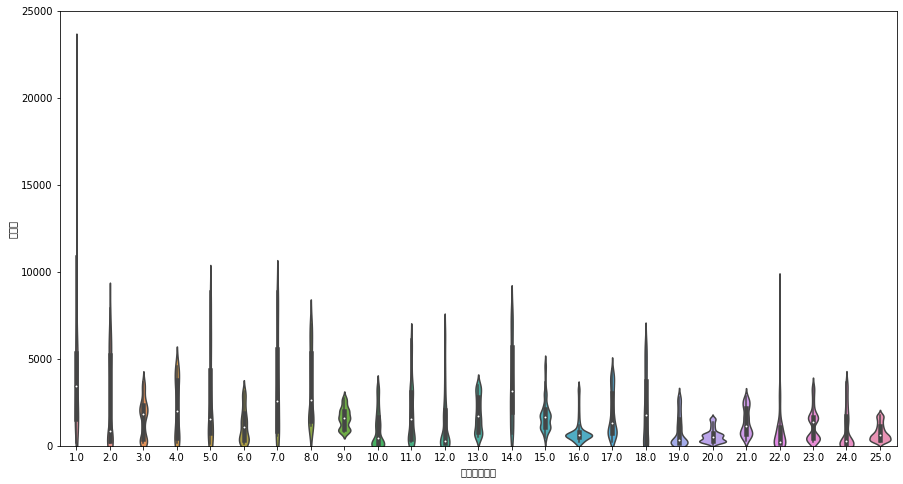

In [17]:
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.violinplot(x='홍수사상번호', y="유입량", data=df_train)
fig.axis(ymin=0, ymax=25000)

(-0.5, 8.5, 0.0, 25000.0)

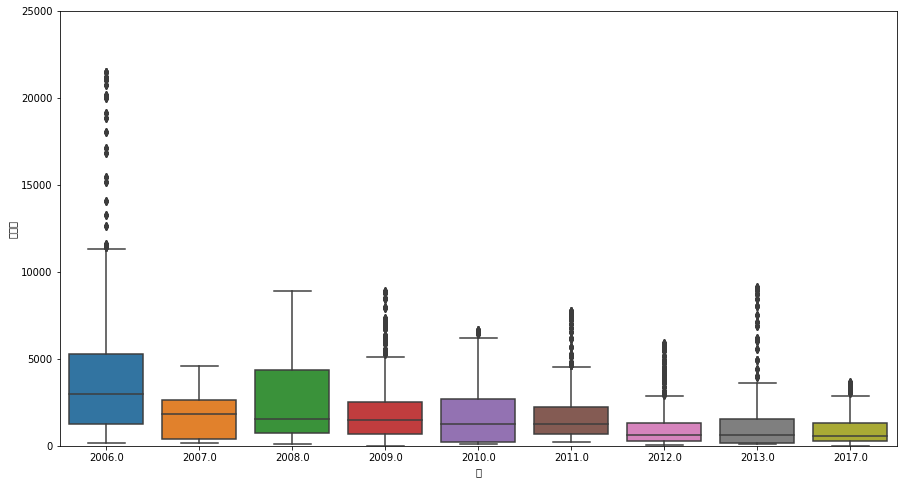

In [18]:
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x='연', y="유입량", data=df_train)
fig.axis(ymin=0, ymax=25000)

(-0.5, 8.5, 0.0, 25000.0)

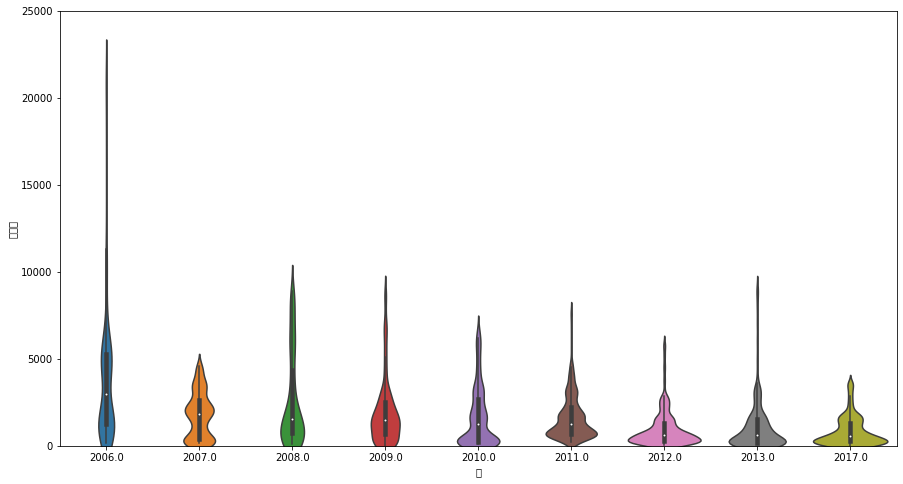

In [19]:
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.violinplot(x='연', y="유입량", data=df_train)
fig.axis(ymin=0, ymax=25000)

(-0.5, 3.5, 0.0, 25000.0)

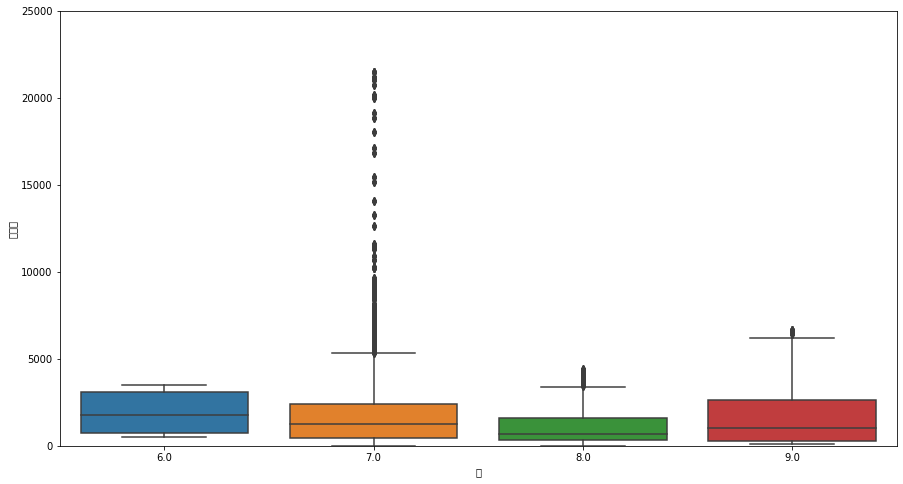

In [20]:
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x='월', y="유입량", data=df_train)
fig.axis(ymin=0, ymax=25000)

(-0.5, 3.5, 0.0, 25000.0)

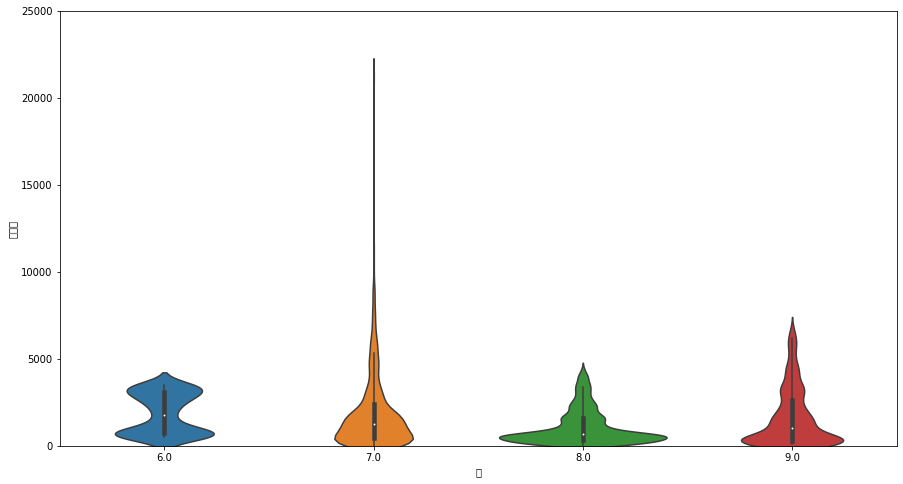

In [21]:
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.violinplot(x='월', y="유입량", data=df_train)
fig.axis(ymin=0, ymax=25000)

(-0.5, 30.5, 0.0, 25000.0)

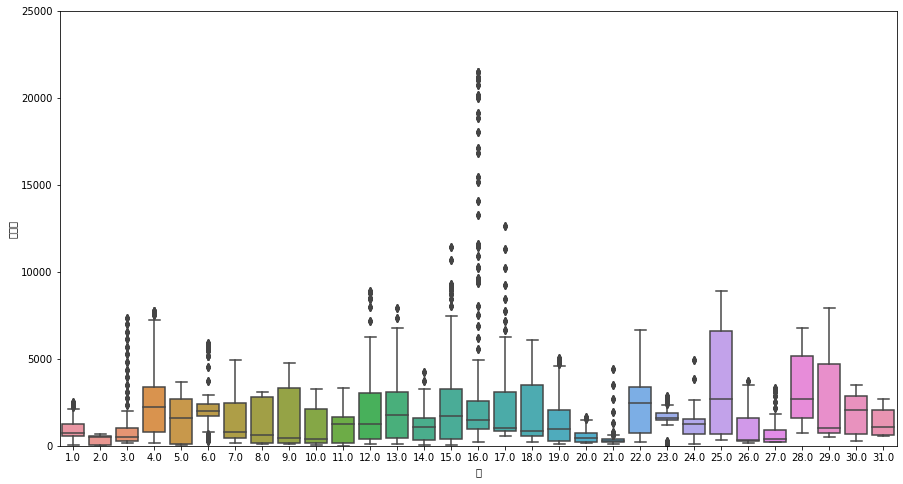

In [22]:
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x='일', y="유입량", data=df_train)
fig.axis(ymin=0, ymax=25000)

(-0.5, 30.5, 0.0, 25000.0)

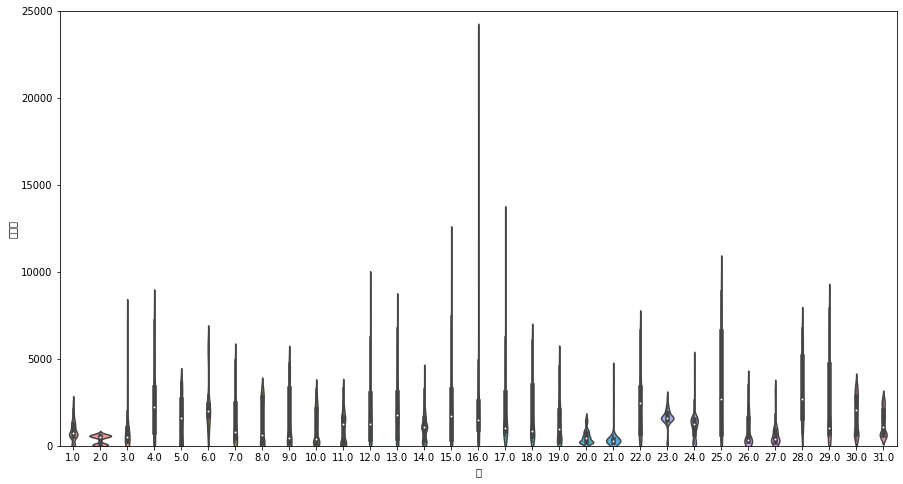

In [23]:
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.violinplot(x='일', y="유입량", data=df_train)
fig.axis(ymin=0, ymax=25000)

(-0.5, 23.5, 0.0, 25000.0)

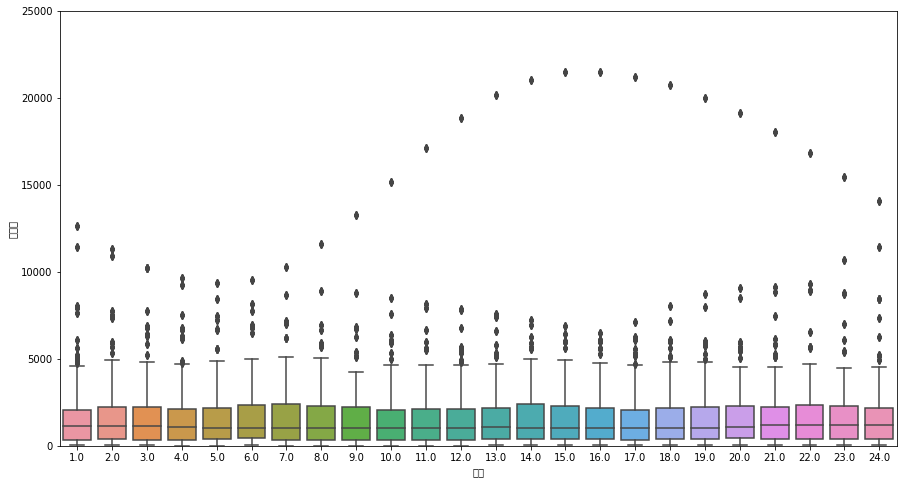

In [24]:
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x='시간', y="유입량", data=df_train)
fig.axis(ymin=0, ymax=25000)

(-0.5, 23.5, 0.0, 25000.0)

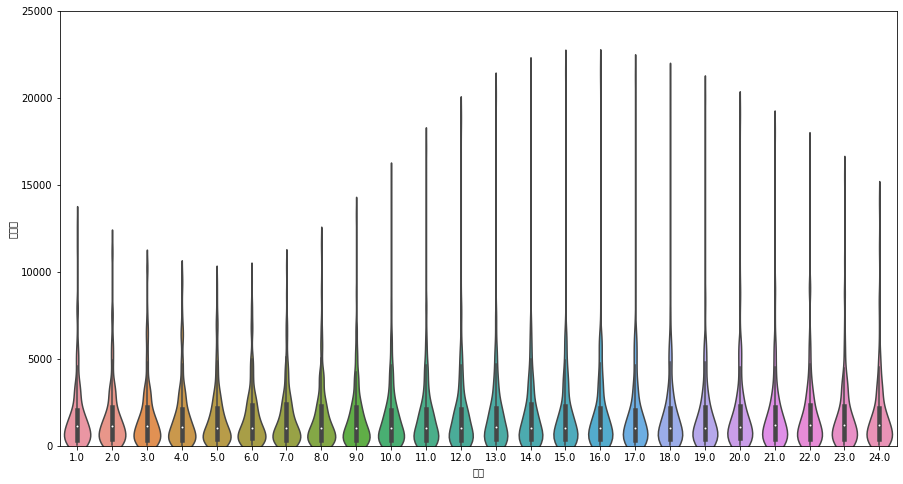

In [25]:
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.violinplot(x='시간', y="유입량", data=df_train)
fig.axis(ymin=0, ymax=25000)

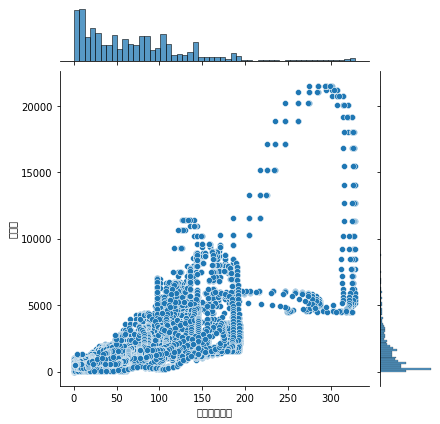

In [26]:
  sns.jointplot(x='유역평균강수', y='유입량', data=df_train, kind = 'scatter')

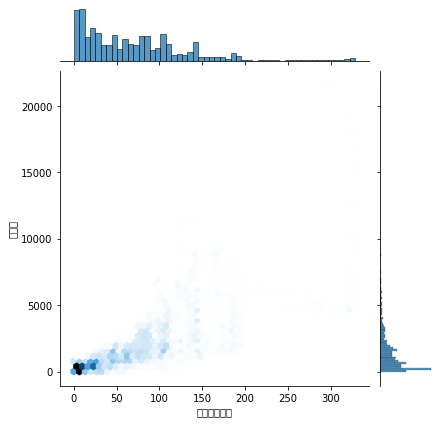

In [27]:
sns.jointplot(x='유역평균강수', y='유입량', data=df_train, kind = 'hex')

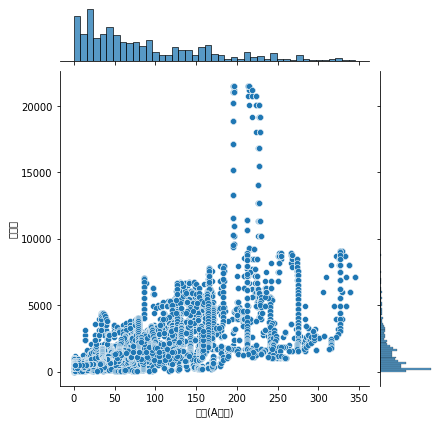

In [28]:
  sns.jointplot(x='강우(A지역)', y='유입량', data=df_train, kind = 'scatter')

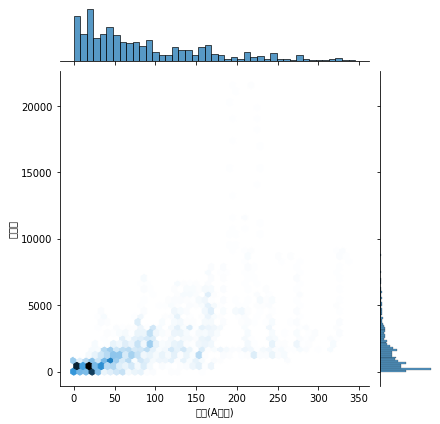

In [29]:
sns.jointplot(x='강우(A지역)', y='유입량', data=df_train, kind = 'hex')

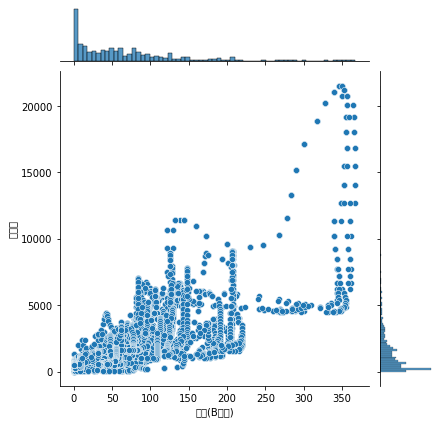

In [30]:
  sns.jointplot(x='강우(B지역)', y='유입량', data=df_train, kind = 'scatter')

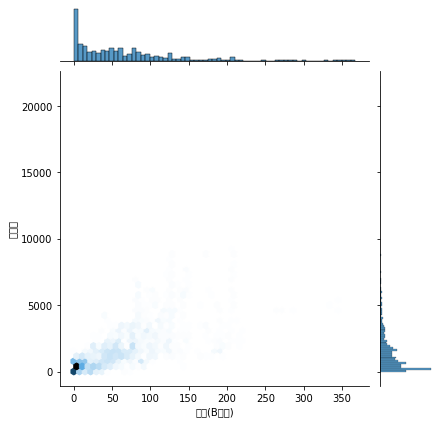

In [31]:
sns.jointplot(x='강우(B지역)', y='유입량', data=df_train, kind = 'hex')

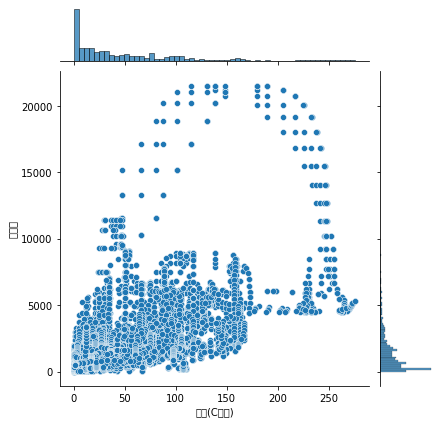

In [32]:
  sns.jointplot(x='강우(C지역)', y='유입량', data=df_train, kind = 'scatter')

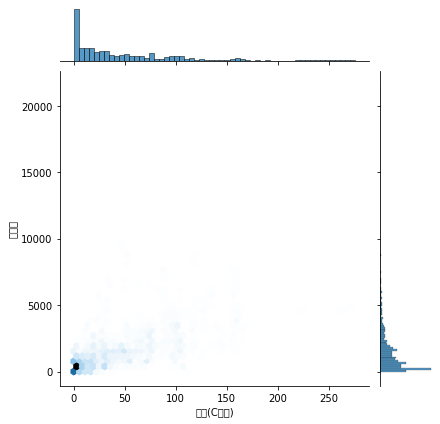

In [33]:
sns.jointplot(x='강우(C지역)', y='유입량', data=df_train, kind = 'hex')

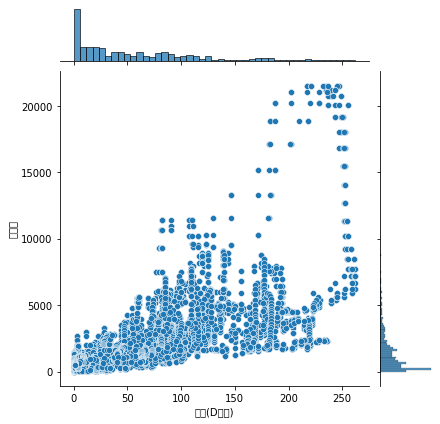

In [34]:
  sns.jointplot(x='강우(D지역)', y='유입량', data=df_train, kind = 'scatter')

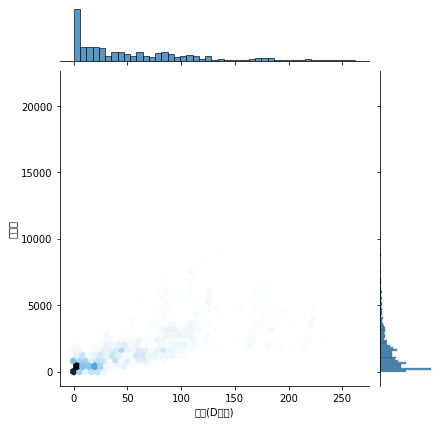

In [35]:
sns.jointplot(x='강우(D지역)', y='유입량', data=df_train, kind = 'hex')

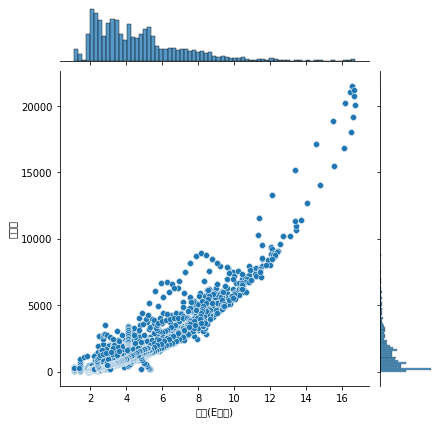

In [36]:
  sns.jointplot(x='수위(E지역)', y='유입량', data=df_train, kind = 'scatter')

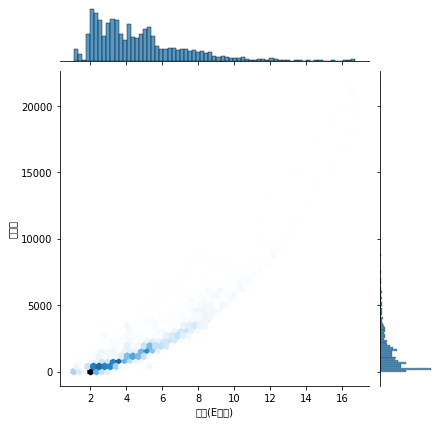

In [37]:
sns.jointplot(x='수위(E지역)', y='유입량', data=df_train, kind = 'hex')

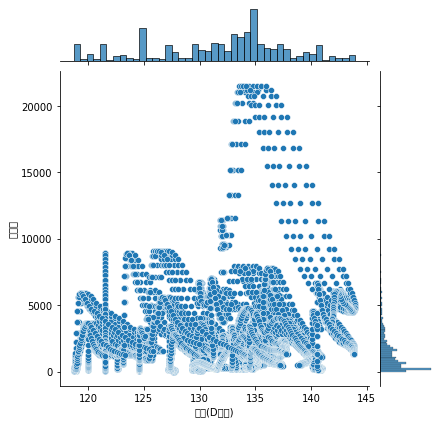

In [38]:
  sns.jointplot(x='수위(D지역)', y='유입량', data=df_train, kind = 'scatter')

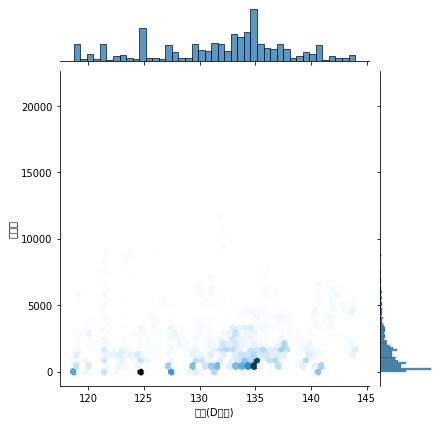

In [39]:
sns.jointplot(x='수위(D지역)', y='유입량', data=df_train, kind = 'hex')

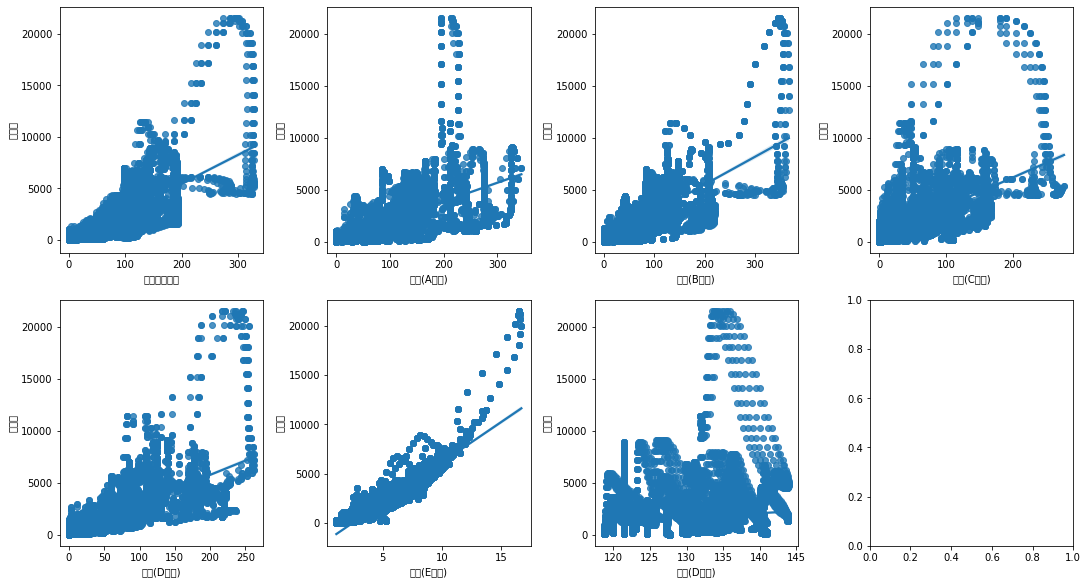

In [40]:
#2행 4열 subplots
fig, axs = plt.subplots(figsize=(15,8), nrows=2, ncols=4, constrained_layout=True)

x_features = ['유역평균강수','강우(A지역)','강우(B지역)','강우(C지역)','강우(D지역)','수위(E지역)','수위(D지역)']

for i, feature in enumerate(x_features):
  row = int(i/4)
  col = i%4
  #산점도와 회귀선 시각화
  sns.regplot(x=feature, y='유입량', data=df_train, ax=axs[row][col])

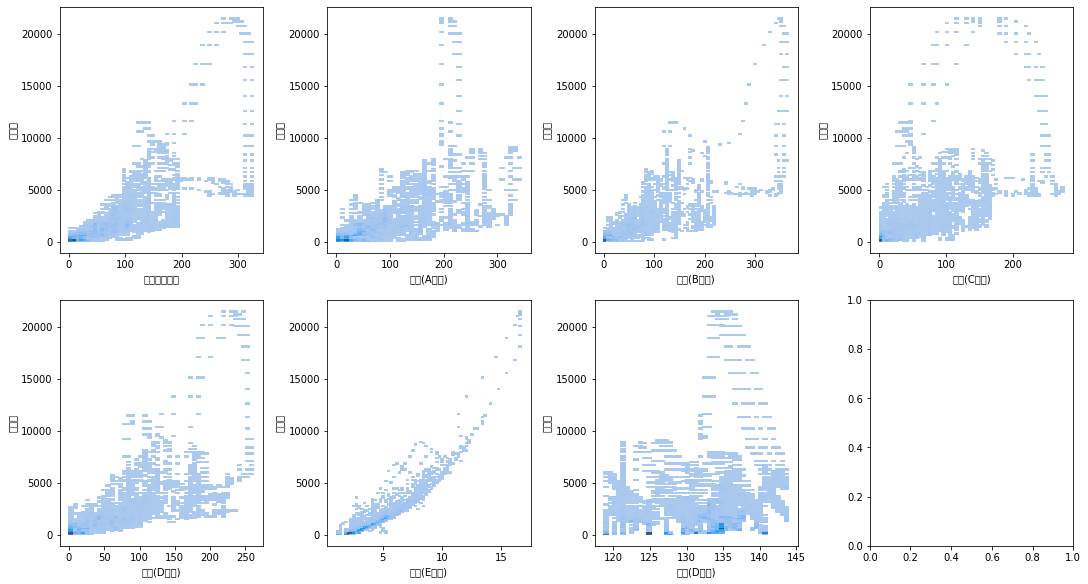

In [41]:
#2행 4열 subplots
fig, axs = plt.subplots(figsize=(15,8), nrows=2, ncols=4, constrained_layout=True)

x_features = ['유역평균강수','강우(A지역)','강우(B지역)','강우(C지역)','강우(D지역)','수위(E지역)','수위(D지역)']

for i, feature in enumerate(x_features):
  row = int(i/4)
  col = i%4
  #분포도 시각화
  sns.histplot(x=feature, y='유입량', data=df_train, ax=axs[row][col])

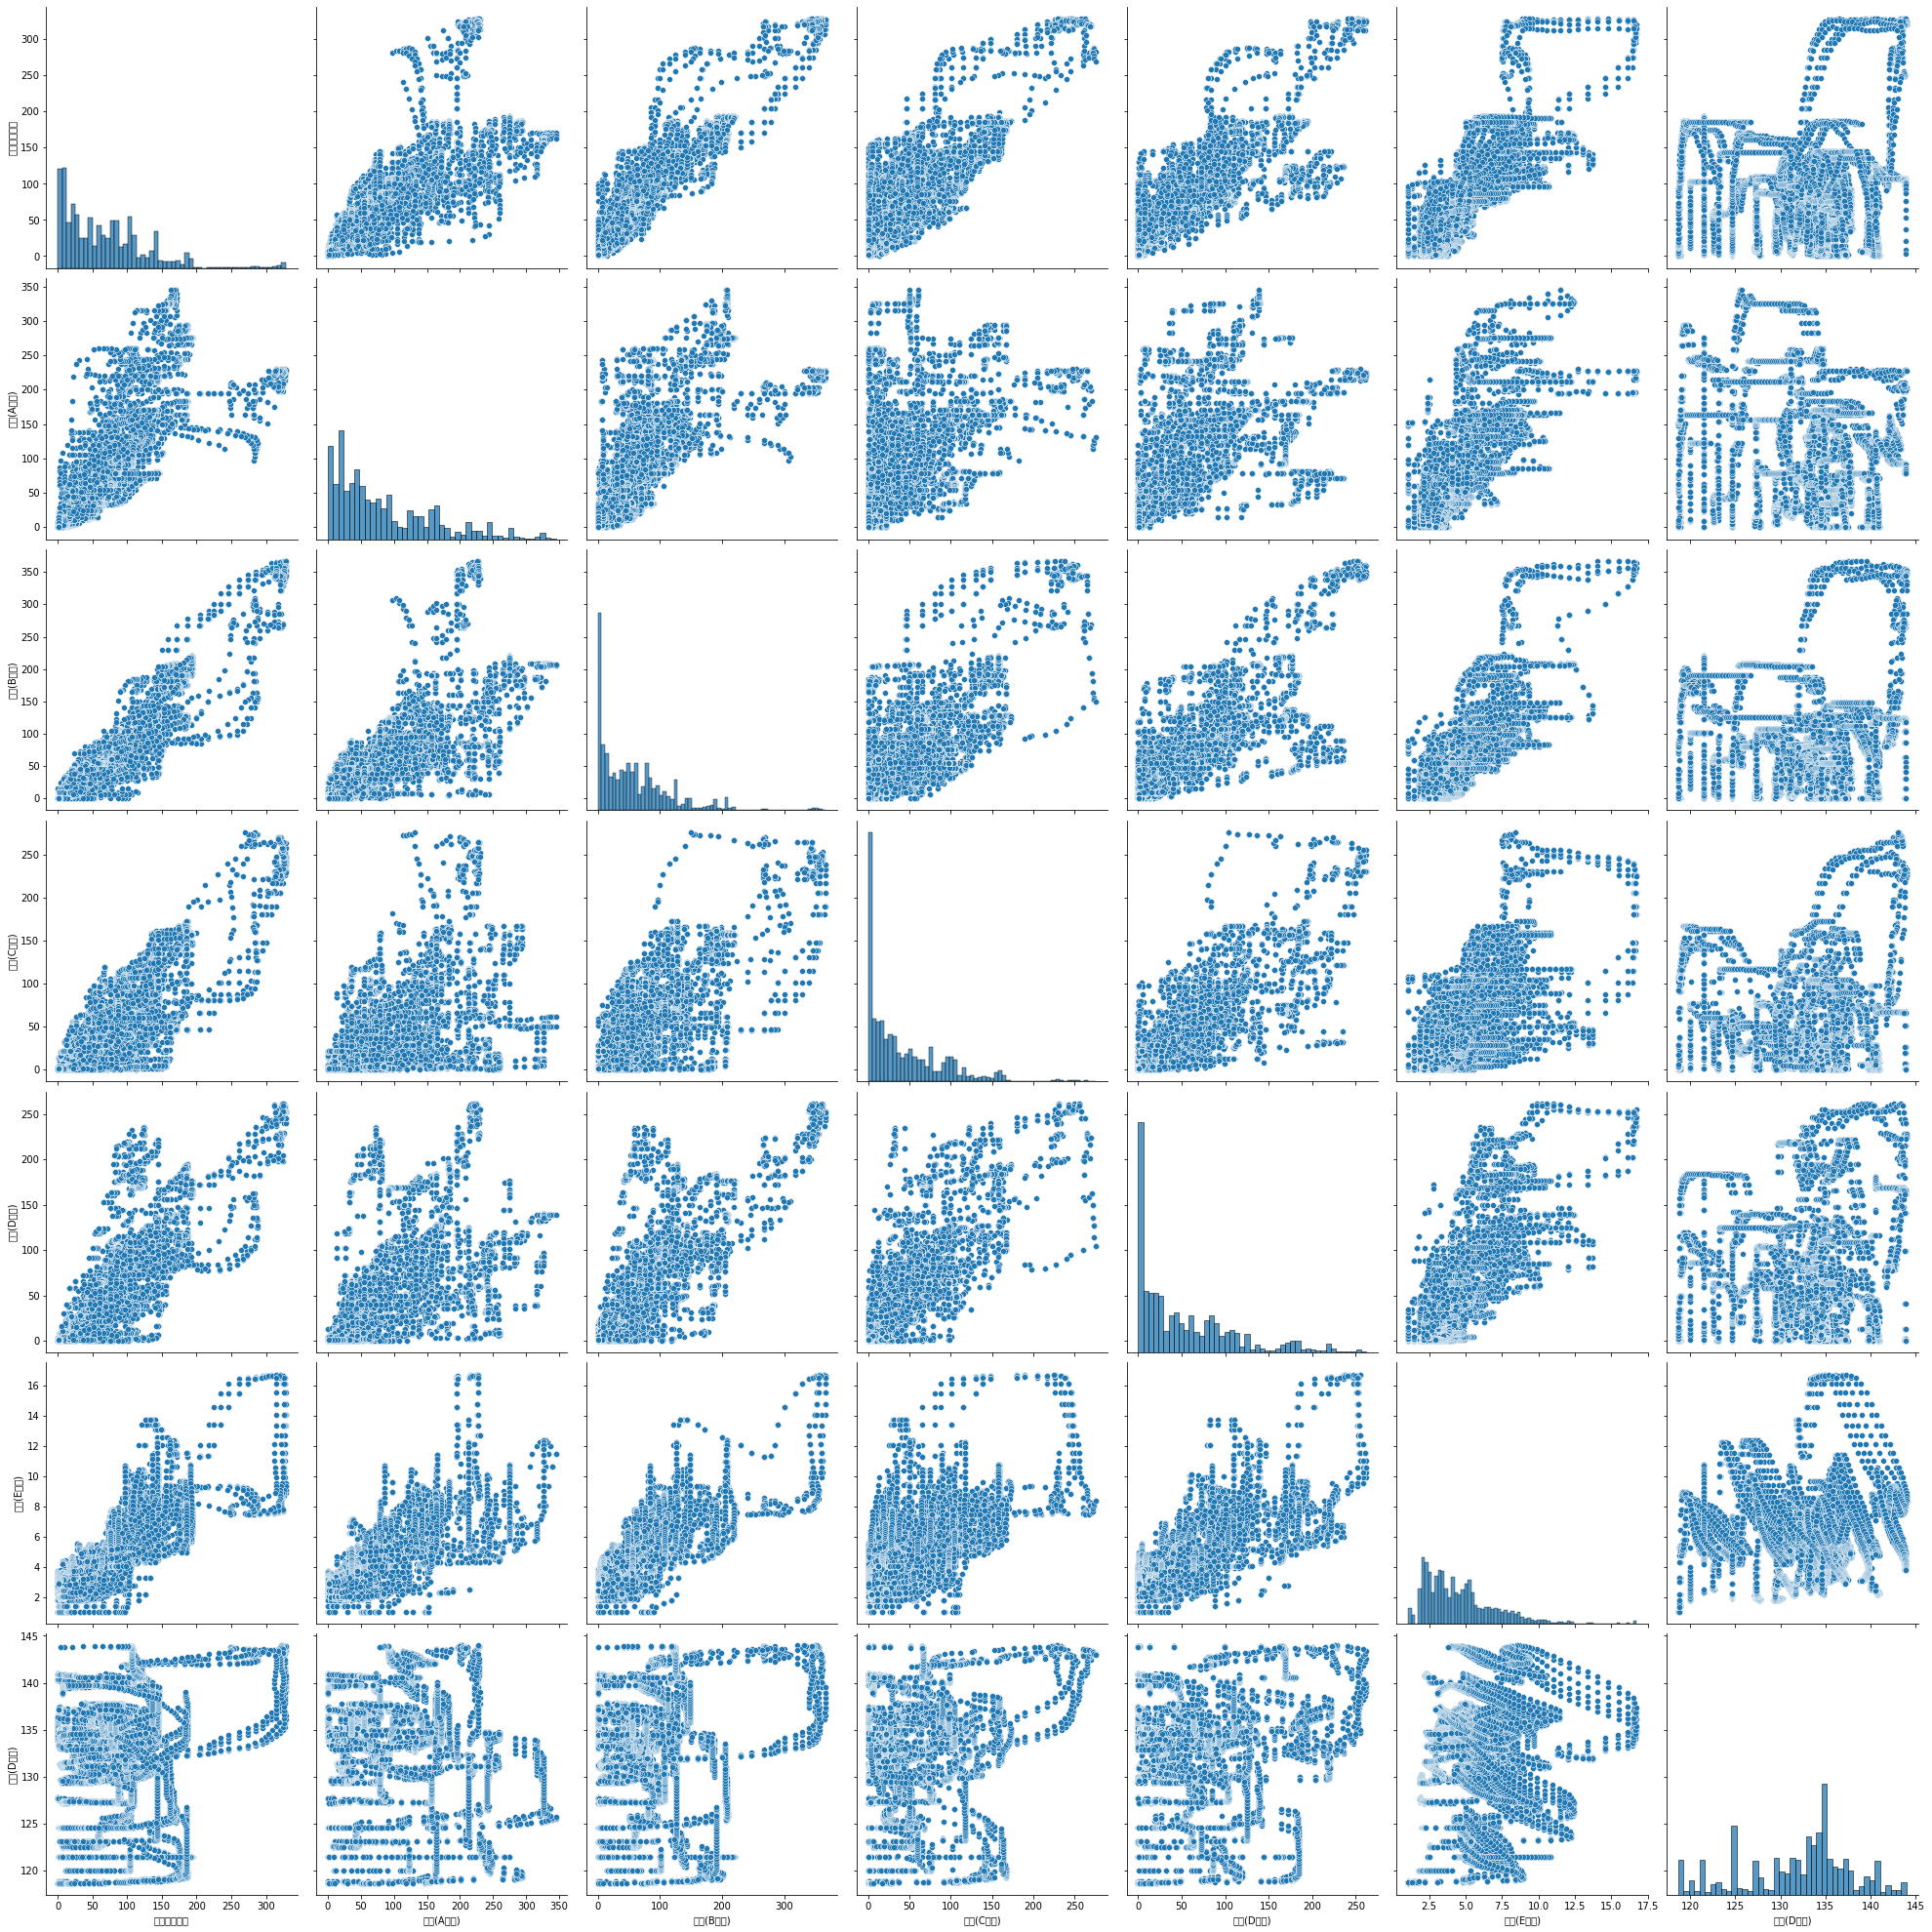

In [42]:
x_features = ['유역평균강수','강우(A지역)','강우(B지역)','강우(C지역)','강우(D지역)','수위(E지역)','수위(D지역)']
sns.pairplot(df_train[x_features], size=4)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


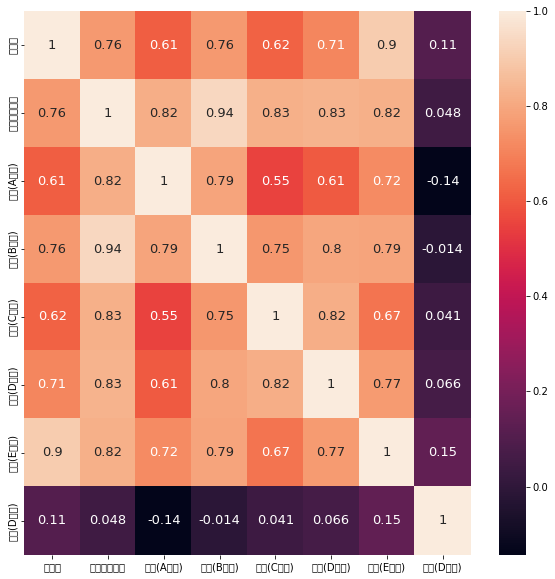

In [43]:
# 컬럼별 상호간의 관계
ccol = ['유입량','유역평균강수','강우(A지역)','강우(B지역)','강우(C지역)','강우(D지역)','수위(E지역)','수위(D지역)']

# 변수간의 상관 계수
corrs = df_train[ccol].corr()

plt.figure(figsize=(10,10))
sns.heatmap(corrs, annot=True, annot_kws={'size':13})

In [44]:
df_train.describe()

홍수사상번호             연  ...       수위(E지역)       수위(D지역)
count  17346.000000  17346.000000  ...  17346.000000  17346.000000
mean      14.324801   2010.765825  ...      4.583075    131.842322
std        7.307992      2.716623  ...      2.422148      6.001269
min        1.000000   2006.000000  ...      1.070000    118.700000
25%        9.000000   2009.000000  ...      2.740000    127.543813
50%       16.000000   2011.000000  ...      4.080000    133.307571
75%       20.000000   2012.000000  ...      5.680000    135.291667
max       25.000000   2017.000000  ...     16.720000    143.966667

[8 rows x 13 columns]

# 데이터 전처리

In [57]:
quartiles = np.percentile(df_train['유입량'], [1,50,85])
mu = quartiles[1]
sig = 0.74*(quartiles[2]-quartiles[0])


In [58]:
#1,50,99분위 값 보기
quartiles

array([  45.43936107, 1065.549253  , 3254.5957    ])

In [59]:
#이상치 제거
df_train = df_train[(df_train['유입량'] < 3254.5957)]
df_train.describe()

홍수사상번호             연  ...       수위(E지역)       수위(D지역)
count  14742.000000  14742.000000  ...  14742.000000  14742.000000
mean      15.348799   2011.118030  ...      3.839259    131.649749
std        6.835228      2.577957  ...      1.532742      5.818263
min        1.000000   2006.000000  ...      1.070000    118.700000
25%       11.000000   2010.000000  ...      2.530000    127.545357
50%       16.000000   2011.000000  ...      3.560000    133.260000
75%       21.000000   2012.000000  ...      5.010000    135.088839
max       25.000000   2017.000000  ...      8.410000    143.900000

[8 rows x 13 columns]

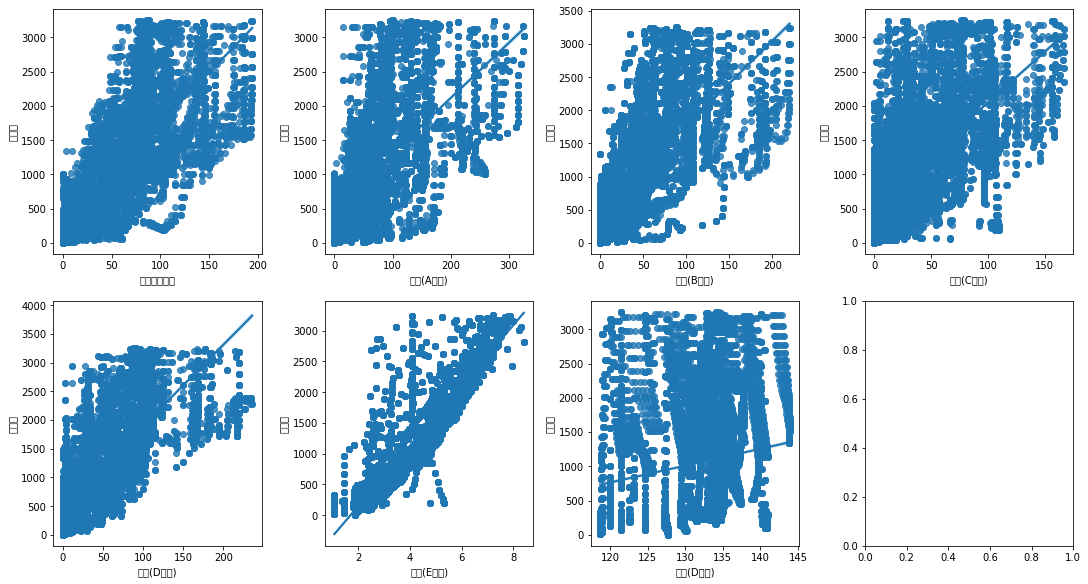

In [60]:
#이상치 제거 후 그래프 확인
#1행 7열 subplots
fig, axs = plt.subplots(figsize=(15,8), nrows=2, ncols=4, constrained_layout=True)

x_features = ['유역평균강수','강우(A지역)','강우(B지역)','강우(C지역)','강우(D지역)','수위(E지역)','수위(D지역)']

for i, feature in enumerate(x_features):
  row = int(i/4)
  col = i%4
  #산점도와 회귀선 시각화
  sns.regplot(x=feature, y='유입량', data=df_train, ax=axs[row][col])

## Train & Valid 구분 및 one-hot vector로 변경

In [61]:
# 연, 월, 일, 시간 모두 전처리
#df_train = pd.concat([df_train, pd.get_dummies(df_train['연'], prefix='year'), pd.get_dummies(df_train['월'], prefix='month'), pd.get_dummies(df_train['일'], prefix='day'), pd.get_dummies(df_train['시간'], prefix='time')], axis=1)
# 홍수사상번호, 연, 월, 일, 시간 모두 전처리

df_train = pd.concat([df_train, pd.get_dummies(df_train['월'], prefix='month'), pd.get_dummies(df_train['일'], prefix='day'), pd.get_dummies(df_train['시간'], prefix='time')], axis=1)
df_train

홍수사상번호       연    월     일  ...  time_21.0  time_22.0  time_23.0  time_24.0
0         1.0  2006.0  7.0  10.0  ...          0          0          0          0
1         1.0  2006.0  7.0  10.0  ...          0          0          0          0
2         1.0  2006.0  7.0  10.0  ...          0          0          0          0
3         1.0  2006.0  7.0  10.0  ...          0          0          0          0
4         1.0  2006.0  7.0  10.0  ...          0          0          0          0
...       ...     ...  ...   ...  ...        ...        ...        ...        ...
17341    25.0  2017.0  7.0  18.0  ...          0          0          0          0
17342    25.0  2017.0  7.0  18.0  ...          0          0          0          0
17343    25.0  2017.0  7.0  18.0  ...          0          0          0          0
17344    25.0  2017.0  7.0  18.0  ...          1          0          0          0
17345    25.0  2017.0  7.0  18.0  ...          0          1          0          0

[14742 rows x 72 columns]

In [62]:
# 데이터 준비 X(독립변수), y(종속변수) 분할하기
X = df_train.drop(['홍수사상번호','연','월','일','시간','유입량'], axis=1)

y = df_train['유입량']

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [63]:
X_train

유역평균강수  강우(A지역)  강우(B지역)  ...  time_22.0  time_23.0  time_24.0
8914    20.1000     22.0     13.0  ...          0          0          0
9881    78.9816     91.0     91.0  ...          0          0          0
11989  105.8000    117.0    116.0  ...          0          0          0
4168    92.6336     93.0     62.0  ...          0          0          0
7884    29.6963     51.0      9.0  ...          0          1          0
...         ...      ...      ...  ...        ...        ...        ...
6237    26.0782     96.0     19.0  ...          0          0          0
15936   74.2504    130.0     57.0  ...          0          0          0
6504    73.0086     93.0     80.0  ...          0          0          0
1186     0.0744      0.0      0.0  ...          0          0          0
8572     1.0631      0.0      0.0  ...          0          0          0

[13267 rows x 66 columns]

#XGboost

In [64]:
xgb_t = XGBRegressor(random_state=42,
                     learning_rate=0.1,
                     n_estimators=5000,
                     subsample=0.7,
                     max_features=0.8,
                     max_depth=8,
                     colsample_bytree=0.7,
                     nfold=3,
                     objective='reg:squarederror'
)

evals = [(X_test, y_test)]

xgb_t.fit(X_train, y_train, early_stopping_rounds = 50, eval_metric="rmse", eval_set = evals, verbose=True)
xgb_t_pred = xgb_t.predict(X_test)

[0]	validation_0-rmse:1203.59
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:1091.84
[2]	validation_0-rmse:990.092
[3]	validation_0-rmse:895.685
[4]	validation_0-rmse:810.836
[5]	validation_0-rmse:734.005
[6]	validation_0-rmse:668.838
[7]	validation_0-rmse:606.757
[8]	validation_0-rmse:550.952
[9]	validation_0-rmse:499.942
[10]	validation_0-rmse:457.876
[11]	validation_0-rmse:420.991
[12]	validation_0-rmse:383.943
[13]	validation_0-rmse:352.871
[14]	validation_0-rmse:324.194
[15]	validation_0-rmse:299.008
[16]	validation_0-rmse:275.96
[17]	validation_0-rmse:257.495
[18]	validation_0-rmse:236.467
[19]	validation_0-rmse:218.419
[20]	validation_0-rmse:203.98
[21]	validation_0-rmse:188.96
[22]	validation_0-rmse:176.268
[23]	validation_0-rmse:164
[24]	validation_0-rmse:154.901
[25]	validation_0-rmse:145.769
[26]	validation_0-rmse:138.181
[27]	validation_0-rmse:131.079
[28]	validation_0-rmse:125.833
[29]	validation_0-rmse:120.358
[30]	validation_0-rmse

In [65]:
r2 = r2_score(y_test, xgb_t_pred)

mse = mean_squared_error(y_test, xgb_t_pred)
xgb_rmse = np.sqrt(mse)
print("MSE: {0:.3f}, RMSE: {1:.3f}".format(mse, xgb_rmse))
print("R2: {:3f}".format(r2))

MSE: 1372.267, RMSE: 37.044
R2: 0.998005


# LightGBM

In [67]:
!pip install lightgbm

In [68]:
from lightgbm import LGBMRegressor

In [69]:
lgbm_t = LGBMRegressor(random_state=1,
                      learning_rate=0.1,
                      n_estimators=5000,
                      subsample=0.7,
                      max_features=0.8,
                      max_depth=8,
                      colsample_bytree=0.7,
                      nfold=3,
)
evals = [(X_test, y_test)]

lgbm_t.fit(X_train, y_train, early_stopping_rounds = 50, 
                eval_metric="rmse", eval_set = evals, verbose=True)
lgbm_t_pred = lgbm_t.predict(X_test)

[1]	valid_0's l2: 580324	valid_0's rmse: 761.79
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's l2: 493038	valid_0's rmse: 702.167
[3]	valid_0's l2: 409538	valid_0's rmse: 639.952
[4]	valid_0's l2: 351220	valid_0's rmse: 592.638
[5]	valid_0's l2: 292777	valid_0's rmse: 541.088
[6]	valid_0's l2: 246243	valid_0's rmse: 496.228
[7]	valid_0's l2: 208123	valid_0's rmse: 456.205
[8]	valid_0's l2: 176960	valid_0's rmse: 420.666
[9]	valid_0's l2: 151105	valid_0's rmse: 388.722
[10]	valid_0's l2: 131636	valid_0's rmse: 362.817
[11]	valid_0's l2: 113657	valid_0's rmse: 337.13
[12]	valid_0's l2: 99214.1	valid_0's rmse: 314.983
[13]	valid_0's l2: 86736.7	valid_0's rmse: 294.511
[14]	valid_0's l2: 77642.5	valid_0's rmse: 278.644
[15]	valid_0's l2: 69099.6	valid_0's rmse: 262.868
[16]	valid_0's l2: 61828.4	valid_0's rmse: 248.653
[17]	valid_0's l2: 56703.7	valid_0's rmse: 238.125
[18]	valid_0's l2: 51388.7	valid_0's rmse: 226.691
[19]	valid_0's l2: 46795.9	valid_0's rmse:

In [70]:
r2 = r2_score(y_test, lgbm_t_pred)

mse = mean_squared_error(y_test, lgbm_t_pred)
lgbm_rmse = np.sqrt(mse)
print("MSE: {0:.3f}, RMSE: {1:.3f}".format(mse,lgbm_rmse))
print("R2: {:3f}".format(r2))

MSE: 1413.225, RMSE: 37.593
R2: 0.997946


# ExtraTreesRegressor

In [71]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse = np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor

# params = { 'n_estimators' : [10, 50, 100, 200],
#            'max_depth' : ['None', 5, 10, 15, 20],
#            'min_samples_leaf' : [1, 5, 10, 15],
#            'min_samples_split' : [2, 5, 10, 15]
#             }
# et_clf = ExtraTreesRegressor(random_state = 42)
# grid_cv = GridSearchCV(et_clf, param_grid = params, cv = 5, n_jobs = -1)
# grid_cv.fit(X_train, y_train)

# print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
# print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

In [74]:

et = ExtraTreesRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
et_y_pred = et.predict(X_test)

mse = mean_squared_error(y_test, et_y_pred)
et_rmse = np.sqrt(mse)

r2 = r2_score(y_test, et_y_pred)

print("MSE: {0:.4f}, RMSE: {1:.4f}".format(mse,et_rmse))
print("R2: {:3f}".format(r2))

MSE: 461.0755, RMSE: 21.4727
R2: 0.999330


In [75]:
total_weight = (1. / xgb_rmse) + (1. / et_rmse) 
pred = (xgb_t_pred * (1. / xgb_rmse) + et_y_pred * (1. / et_rmse)) / total_weight

mse = mean_squared_error(y_test, pred)

print("MSE: {0:.4f}, RMSE: {1:.4f}".format(mse,np.sqrt(mse)))

MSE: 617.1285, RMSE: 24.8421
